### Problem Statement: Predict delivery time using sorting time

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as sc
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [115]:
delivery = pd.read_csv('delivery_time.csv')

In [116]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [117]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting Time'>

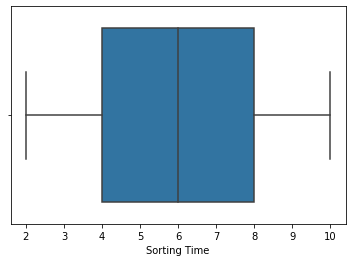

In [118]:
sns.boxplot(x='Sorting Time',data=delivery)

Our input variable is not having any outliers hence we can proceed as is with this data

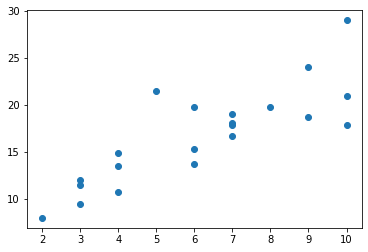

In [119]:
plt.scatter(x='Sorting Time', y='Delivery Time', data=delivery)

<AxesSubplot:>

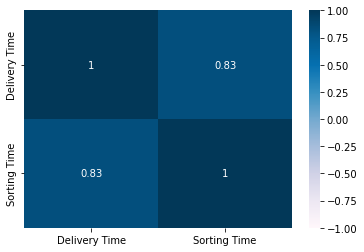

In [120]:
sns.heatmap(delivery.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')

From the above two graphs, we can say that there is a good positive correlation between the independent variable and the target variable, Since the target variable is Numerical, we can go for Simple Linear Regression

In [121]:
#Seperating Independent and target variable
X = delivery['Sorting Time']
Y = delivery['Delivery Time']


#Adding constant 'c' to the equation
X = sm.add_constant(X)

In [122]:
#Model Implementation
LR1 = sm.OLS(Y,X).fit()
LR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        14:12:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
delivery['Predictions'] = LR1.predict(X)

In [124]:
delivery

,Delivery Time,Sorting Time,Predictions
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


This model can considered as poor based on the r-squared value<br>
Hence we try to find other ways to improve the model accuracy<br>
Let's try to remove the y-intercept from the equation<br>

In [125]:
#Seperating Independent and target variable
X = delivery['Sorting Time']
Y = delivery['Delivery Time']
#Not adding the y-intercept this time

In [126]:
#Model Implementation
LR2 = sm.OLS(Y,X).fit()
LR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                    6.12e-15
Time:                        14:12:29   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can now observe a pretty good improvement compared to LR1 Model, Hence we can move forward with this model

In [127]:
delivery['Predictions'] = LR2.predict(X)

In [128]:
delivery

,Delivery Time,Sorting Time,Predictions
0,21.00,10,25.652463
1,13.50,4,10.260985
2,19.75,6,15.391478
3,24.00,9,23.087216
4,29.00,10,25.652463
5,15.35,6,15.391478
6,19.00,7,17.956724
7,9.50,3,7.695739
8,17.90,10,25.652463
9,18.75,9,23.087216


Let's check how close our predicted values are with our actual values in a graph

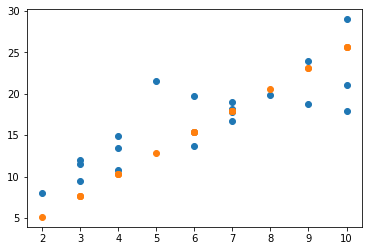

In [129]:
plt.scatter(delivery['Sorting Time'],delivery['Delivery Time'])
plt.scatter(delivery['Sorting Time'],delivery['Predictions'])
plt.show()

### Problem Statement: Build a prediction model for Salary_hike

In [130]:
salaryHike = pd.read_csv('Salary_Data.csv')

In [131]:
salaryHike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [132]:
salaryHike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [133]:
salaryHike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='Salary'>

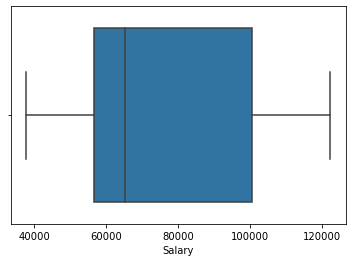

In [134]:
sns.boxplot(x='Salary',data=salaryHike)

By the boxplot, the given independent variable is right-skewed

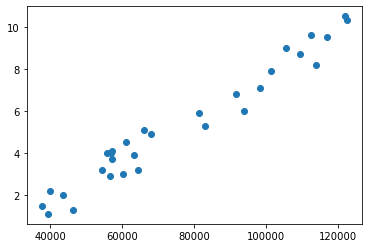

In [135]:
plt.scatter(x='Salary', y='YearsExperience', data=salaryHike)

<AxesSubplot:>

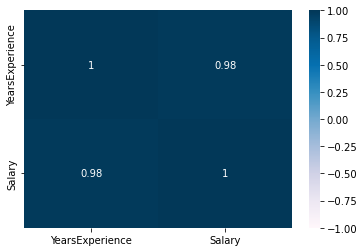

In [136]:
sns.heatmap(salaryHike.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')

From the above two graphs, we can say that there is a good positive correlation between the independent variable and the target variable, Since the target variable is Numerical, we can go for Simple Linear Regression

In [137]:
#Seperating Independent and target variable
X = salaryHike['YearsExperience']
Y = salaryHike['Salary']

X = sm.add_constant(X)

In [138]:
#Model Implementation
salaryLR1 = sm.OLS(Y,X).fit()
salaryLR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        14:12:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
salaryHike['Predictions'] = salaryLR1.predict(X)
salaryHike

,YearsExperience,Salary,Predictions
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [106]:
mae1 = mean_absolute_error(salaryHike['YearsExperience'], salaryHike['Predictions'])
print(mae1)

75997.68666666669


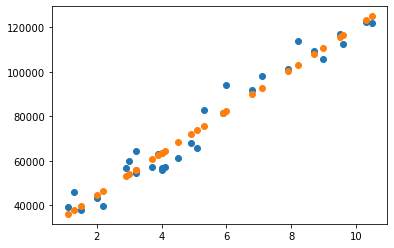

In [107]:
plt.scatter(salaryHike['YearsExperience'],salaryHike['Salary'])
plt.scatter(salaryHike['YearsExperience'],salaryHike['Predictions'])
plt.show()

Let's see removing y-intercept will affect the model

In [108]:
#Seperating Independent and target variable
X = salaryHike['YearsExperience']
Y = salaryHike['Salary']

In [109]:
#Model Implementation
salaryLR2 = sm.OLS(Y,X).fit()
salaryLR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                    2.56e-24
Time:                        14:11:51   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
salaryHike['Predictions'] = salaryLR2.predict(X)
salaryHike

,YearsExperience,Salary,Predictions
0,1.1,39343.0,14580.432300
1,1.3,46205.0,17231.419991
2,1.5,37731.0,19882.407682
3,2.0,43525.0,26509.876909
4,2.2,39891.0,29160.864600
5,2.9,56642.0,38439.321518
6,3.0,60150.0,39764.815363
7,3.2,54445.0,42415.803054
8,3.2,64445.0,42415.803054
9,3.7,57189.0,49043.272281


In [111]:
mae2 = mean_absolute_error(salaryHike['YearsExperience'], salaryHike['Predictions'])
print(mae2)

70422.5929878143


In [112]:
print(mae1 > mae2)

True


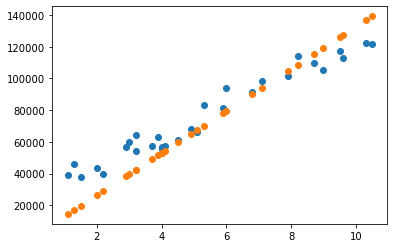

In [75]:
plt.scatter(salaryHike['YearsExperience'],salaryHike['Salary'])
plt.scatter(salaryHike['YearsExperience'],salaryHike['Predictions'])
plt.show()

Comparing both the models, LR2 is having less error compared with LR1, Hence LR2 can be considered as best model